
## 데이터 세트 정보:

복잡한 현대 반도체 제조 공정은 일반적으로 센서 및/또는 공정 측정 지점에서 수집된 신호/변수 모니터링을 통해 일관된 감시 하에 있습니다. 그러나 이러한 모든 신호가 특정 모니터링 시스템에서 동등하게 가치가 있는 것은 아닙니다. 측정된 신호에는 유용한 정보, 관련 없는 정보 및 노이즈의 조합이 포함됩니다. 유용한 정보가 후자에 묻혀 있는 경우가 많습니다. 엔지니어는 일반적으로 실제로 필요한 것보다 훨씬 더 많은 수의 신호를 가지고 있습니다. 각 유형의 신호를 특성으로 간주하면 특성 선택을 적용하여 가장 관련성이 높은 신호를 식별할 수 있습니다. 그런 다음 프로세스 엔지니어는 이러한 신호를 사용하여 프로세스의 다운스트림 수율에 기여하는 핵심 요소를 결정할 수 있습니다. 이것은 프로세스 처리량의 증가를 가능하게 할 것이며,

현재의 비즈니스 개선 기술을 향상시키기 위해 지능형 시스템 기술로서 기능 선택의 적용이 조사되고 있습니다.

이 경우에 제공된 데이터 세트는 각 예가 관련 측정 기능이 있는 단일 프로덕션 엔터티를 나타내고 레이블이 사내 라인 테스트, 그림 2 및 관련 날짜 타임스탬프에 대한 간단한 합격/불합격 수율을 나타내는 그러한 기능의 선택을 나타냅니다. 여기서 -1은 통과에 해당하고 1은 실패에 해당하며 데이터 타임스탬프는 해당 특정 테스트 지점에 대한 것입니다.


기능 선택 기술을 사용하여 제품의 전체 수율에 미치는 영향에 따라 기능의 순위를 지정하는 것이 바람직하며, 주요 기능을 식별하기 위해 인과 관계도 고려할 수 있습니다.

오류율을 평가 지표로 사용하여 예측 가능성에 대한 기능 관련성 측면에서 결과를 제출할 수 있습니다. 이러한 결과를 생성하기 위해 교차 검증을 적용하는 것이 좋습니다. 간단한 커널 릿지 분류기와 10겹 교차 검증을 사용하는 기본 기능 선택 기술에 대한 일부 기준선 결과가 아래에 나와 있습니다.

기준 결과: 데이터를 표준화하고 상수 기능을 제거하기 위해 전처리 개체를 데이터세트에 적용한 다음, 가장 높은 순위의 기능 40개를 선택하는 다양한 기능 선택 개체를 간단한 분류기로 적용하여 초기 결과를 얻었습니다. 10겹 교차 검증이 사용되었으며 이 데이터 세트를 조사하는 데 도움이 되는 초기 성능 메트릭으로 균형 오류율(*BER)이 생성되었습니다.


SECOM 데이터 세트: 1567개의 예 591개의 기능, 104개의 실패

* FS 방법(40개의 기능) BER % True + % True - %
* S2N(신호 대 잡음) 34.5 +-2.6 57.8 +-5.3 73.1 +2.1
* Ttest 33.7 +-2.1-40.7. + -1.8
* 상호 -2.8 40.1 + 48.3 + 71.6 + -5.9 -3.2
* 피어슨 -2.0 34.1 + 57.4 + 74.4 + -4.3 -4.9
* FTEST -2.2 33.5 + 59.1 + 73.8 + -4.8 -1.8
* 그람 슈미트 -2.4 35.6 + 51.2 + -11.8 77.5 +-2.3



[UCI SECOM Dataset | Kaggle](https://www.kaggle.com/paresh2047/uci-semcom?select=uci-secom.csv)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("uci-secom.csv")
df.shape

(1567, 592)

In [3]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


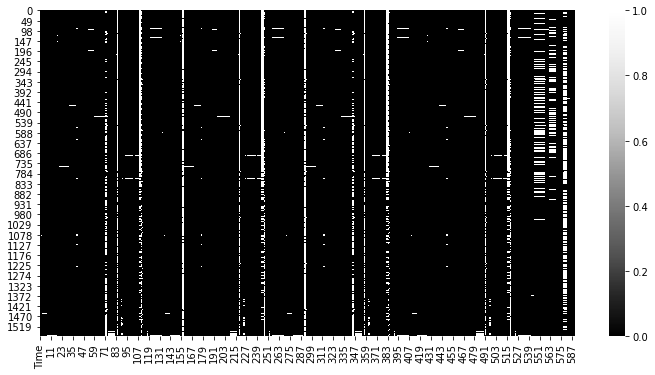

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="Greys_r")

In [6]:
null_sum = df.isnull().sum() 
null_sum[null_sum > 10]

2       14
3       14
4       14
5       14
6       14
      ... 
569    273
578    949
579    949
580    949
581    949
Length: 127, dtype: int64